In [1]:
df<-read.csv("/kaggle/input/final-data/final_data.csv")
head(df)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,employee_residence,remote_ratio,company_location,company_size
,<int>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>
1,2025,Senior-level,FT,Data Scientist,199750,USD,US,On site,US,M
2,2025,Senior-level,FT,Data Scientist,270000,USD,US,On site,US,M
3,2025,Intermediate,FT,Data Scientist,172000,USD,US,On site,US,M
4,2025,Junior,FT,Data Scientist,172000,USD,US,On site,US,M
5,2025,Intermediate,FT,Data Scientist,98000,USD,US,On site,US,M
6,2025,Senior-level,FT,Data Scientist,375000,USD,US,Fully Remote,US,M


In [4]:
df_final <- subset(df, select = -c(employment_type, salary_currency,company_location,employee_residence,job_title))

In [5]:
df_final

,work_year,experience_level,salary,remote_ratio,company_size
,<int>,<chr>,<int>,<chr>,<chr>
1,2025,Senior-level,199750,On site,M
2,2025,Senior-level,270000,On site,M
3,2025,Intermediate,172000,On site,M
4,2025,Junior,172000,On site,M
5,2025,Intermediate,98000,On site,M
6,2025,Senior-level,375000,Fully Remote,M
7,2025,Senior-level,110000,On site,M
8,2025,Senior-level,166080,On site,M
9,2025,Senior-level,80000,On site,M


> We are going to estimate the mean of **SALARY** from our final_data. Using Bootsrap and Jackknfife to estimate the bias and variance 

# Bootstrap

In [7]:
set.seed(123) 
sample.size <- nrow(df_final) # sample size
n.samples <-1000 #Number of Replicates

bootstrap.results <- c() # empty vector to hold the results

for (i in 1:n.samples)
{
    obs <- sample(1:sample.size, replace=TRUE)
    bootstrap.results[i] <- mean(df_final$salary[obs]) # Mean of the bootstrap sample
}

In [46]:
# Calculate 95% Confidence Interval using the percentile met

bootstrap_ci_lower <- quantile(bootstrap.results, 0.025)
bootstrap_ci_upper <- quantile(bootstrap.results, 0.975)

cat("95% Bootstrap Confidence Interval for Mean Salary:\n")
cat("Lower Bound:", round(bootstrap_ci_lower, 2), "\n")
cat("Upper Bound:", round(bootstrap_ci_upper, 2))


95% Bootstrap Confidence Interval for Mean Salary:
Lower Bound: 156462.6 
Upper Bound: 241056.4

There is a 95% chance that the true population mean salary lies between 156,462.60 USD and 241,056.40 USD , based on the resampled distributions of the sample mean.

In [40]:
bootstrap_variance <- var(bootstrap.results)
cat("Bootstrap estimate of variance of mean salary:", bootstrap_variance)   

Bootstrap estimate of variance of mean salary: 494951816

The variance  tells us how much the average salary might change if we collected a different sample from the same population.

In [9]:
# Bias (Bootstrap)
theta_hat <- mean(df_final$salary)
theta_star_bar <- mean(bootstrap.results)

bootstrap_bias <- theta_star_bar - theta_hat

cat("θ̂ (original estimate):", theta_hat, "\n")
cat("θ̂* (mean of bootstrap estimates):", theta_star_bar, "\n")
cat("Bootstrap Bias (θ̂* - θ̂):", bootstrap_bias, "\n")

θ̂ (original estimate): 191425 
θ̂* (mean of bootstrap estimates): 192100.6 
Bootstrap Bias (θ̂* - θ̂): 675.662 


On average, the bootstrap samples gave a mean salary $ 675.66 higher than your original sample mean. Which is not too far from our original mean.

In [12]:
#standard error of Bootstrap Estimates

bootstrap_se<-sd(bootstrap.results)
cat("Bootstrap Standard Error:", bootstrap_se)      

Bootstrap Standard Error: 22247.51

This tells us the uncertainty of our estimate of the mean salary: 191,425 ± about 22,247 in USD.

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 143129  175048  190053  192101  205975  285482 

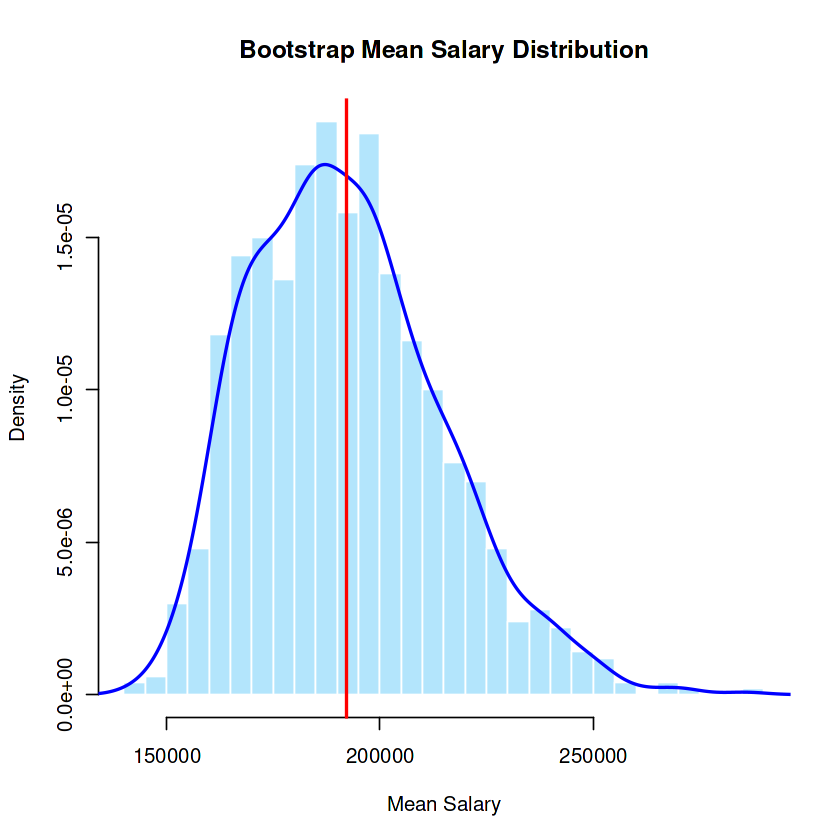

In [13]:
# Visualize the Resampling Results

hist(bootstrap.results,
     breaks = 30,
     col = "#B3E5FC",
     border = "white",
     freq = FALSE,
     main = "Bootstrap Mean Salary Distribution",
     xlab = "Mean Salary")


lines(density(bootstrap.results), col = "blue", lwd = 2)
abline(v = theta_star_bar, col = "red", lwd = 2)

summary(bootstrap.results)
     

# Jackknife

In [44]:
n <- nrow(df_final) #sample size
x<-df_final$salary # data
theta.hat<-mean(x) #mean of 

theta.jack <- numeric(n) #storage

for (i in 1:n){
theta.jack[i]<-mean(x[-i])
}

In [48]:
# Calculate 95% Confidence Interval using the percentile method

jackknife_ci_lower <- quantile(theta.jack, 0.025)
jackknife_ci_upper <- quantile(theta.jack, 0.975)

cat("95% Jackkknife Confidence Interval for Mean Salary:\n")
cat("Lower Bound:", round(jackknfie_ci_lower, 2), "\n")
cat("Upper Bound:", round(jackknife_ci_upper, 2))

95% Jackkknife Confidence Interval for Mean Salary:
Lower Bound: 181823.2 
Upper Bound: 194817.2

There is a 95% chance that the true population mean salary lies between 181,823.20 USD and 194,817.20 USD , based on the resampled distributions of the sample mean.

In [45]:
#Jackknife Mean variance
jackknife_var <- (n - 1) / n * sum((theta.jack - mean(theta.jack))^2)
cat("Jackknife variance estimate for mean salary:", jackknife_var)

Jackknife variance estimate for mean salary: 463805592

The variance  tells us how much the average salary might change if we collected a different sample from the same population.

In [16]:
#Jackknife Bias

jackknife_bias<-(n-1)*(mean(theta.jack)-theta.hat)
cat("Jackknife Bias estimate for mean salary:", jackknife_bias)

Jackknife Bias estimate for mean salary: 0

The sample mean is stable  not affected by individual data points as Bias = 0. This is expected as the purpose of the jackknife technique is to reduce the bias of a statistic in its estimation

In [18]:
# Jackknfife Standard Error

jackknife_se<-sqrt((n-1)*mean((theta.jack - mean(theta.jack))^2))
cat("Jackknife Standard Error :", jackknife_se)

Jackknife Standard Error : 21536.15

This tells us the uncertainty of our estimate of the mean salary: 191,425 ± about 21,536 in USD.

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 173198  190614  192367  191425  193684  195267 

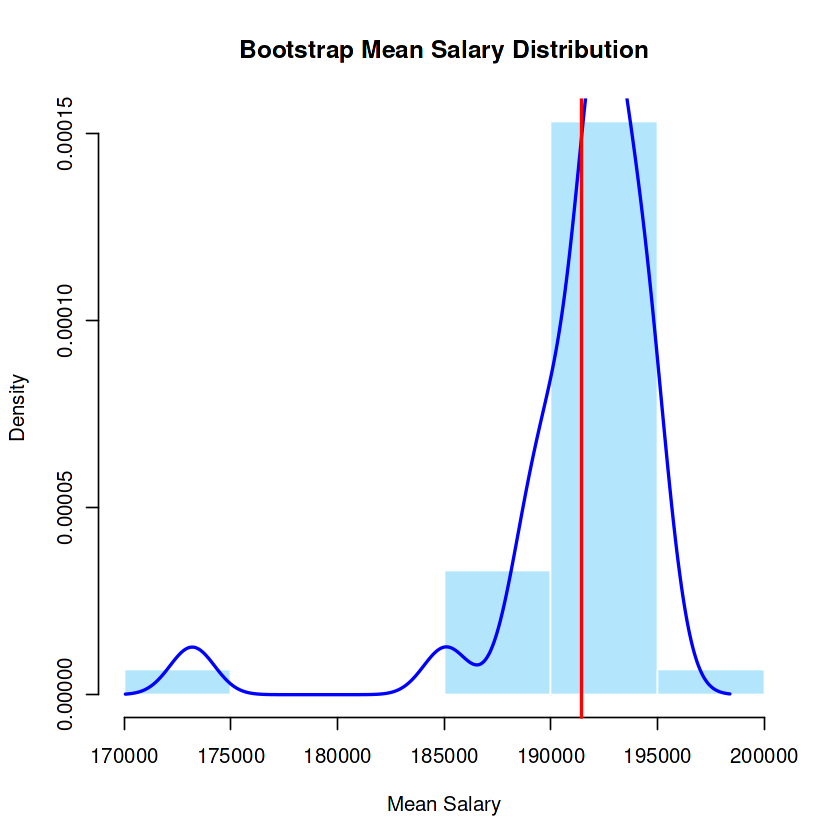

In [15]:
# Visualize the Resampling Results


hist(theta.jack,
     col = "#B3E5FC",
     border = "white",
     freq = FALSE,
     main = "Bootstrap Mean Salary Distribution",
     xlab = "Mean Salary")


lines(density(theta.jack), col = "blue", lwd = 2)
abline(v = mean(theta.jack), col = "red", lwd = 2)

summary(theta.jack)
     

# Comparing Theoretical vs Estimates

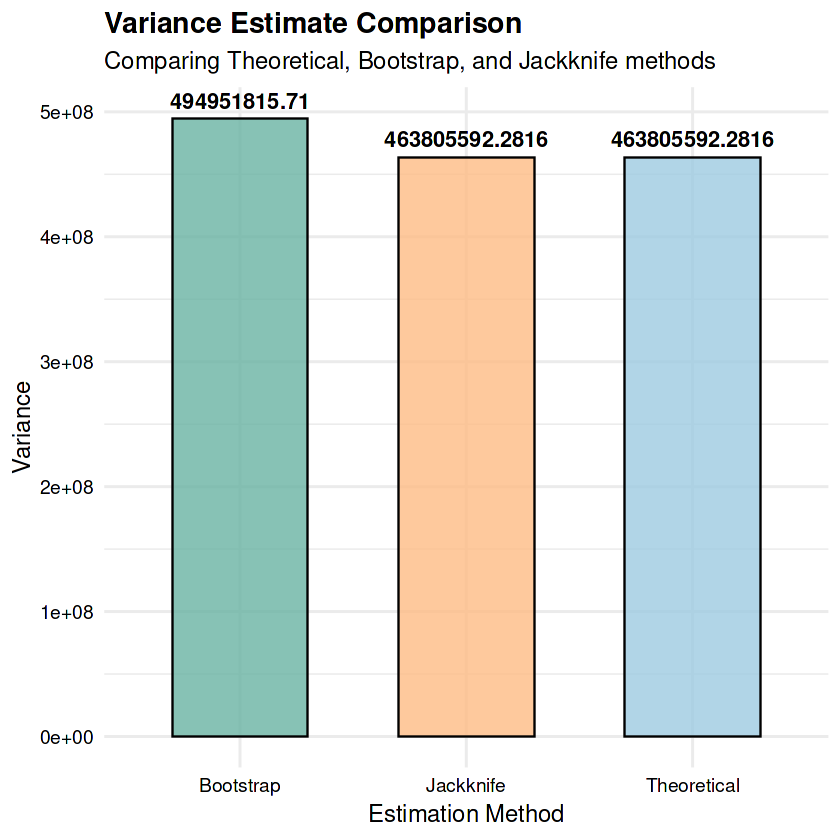

In [30]:
library(ggplot2)

variance_df <- data.frame(
  Method = c("Theoretical", "Bootstrap", "Jackknife"),
  Variance = c(theoretical_variance, bootstrap_variance, jackknife_var)
)

ggplot(variance_df, aes(x = Method, y = Variance, fill = Method)) +
  geom_col(width = 0.6, color = "black", alpha = 0.8, show.legend = FALSE) +
  geom_text(aes(label = round(Variance, 4)), 
            vjust = -0.6, size = 4.5, fontface = "bold") +
  scale_fill_manual(values = c("#69b3a2", "#fdbb84", "#9ecae1")) +
  labs(
    title = "Variance Estimate Comparison",
    subtitle = "Comparing Theoretical, Bootstrap, and Jackknife methods",
    x = "Estimation Method",
    y = "Variance"
  ) +
  theme_minimal(base_size = 14) +
  theme(
    plot.title = element_text(face = "bold"),
    axis.text = element_text(color = "black")
  )


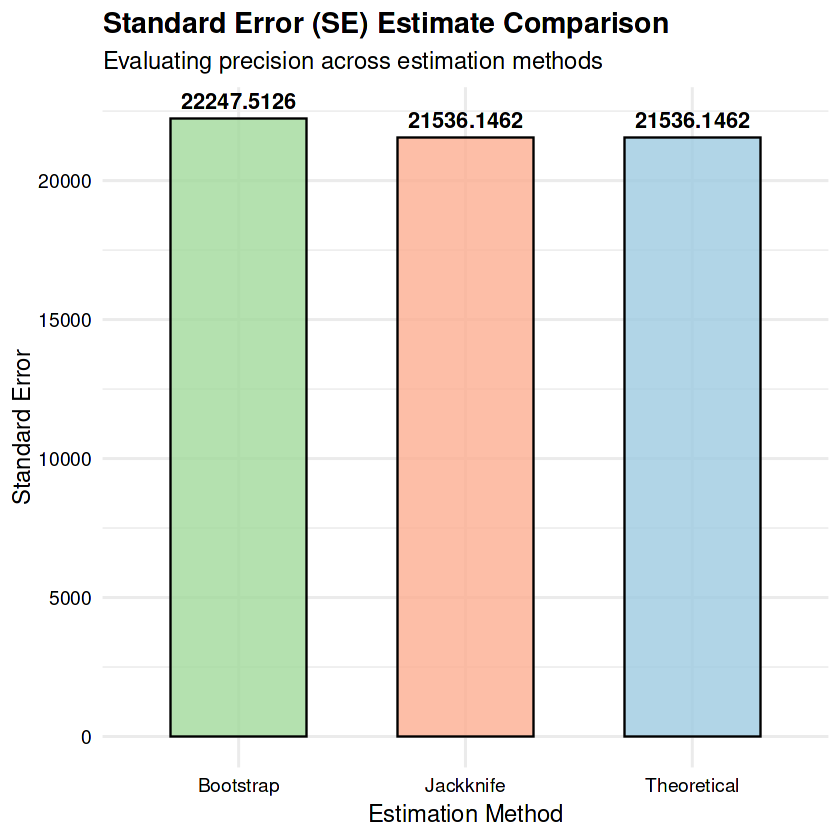

In [32]:
se_df <- data.frame(
  Method = c("Theoretical", "Bootstrap", "Jackknife"),
  SE = c(theoretical_se, bootstrap_se, jackknife_se)
)

ggplot(se_df, aes(x = Method, y = SE, fill = Method)) +
  geom_col(width = 0.6, color = "black", alpha = 0.8, show.legend = FALSE) +
  geom_text(aes(label = round(SE, 4)), 
            vjust = -0.6, size = 4.5, fontface = "bold") +
  scale_fill_manual(values = c("#a1d99b", "#fcae91", "#9ecae1")) +
  labs(
    title = "Standard Error (SE) Estimate Comparison",
    subtitle = "Evaluating precision across estimation methods",
    x = "Estimation Method",
    y = "Standard Error"
  ) +
  theme_minimal(base_size = 14) +
  theme(
    plot.title = element_text(face = "bold"),
    axis.text = element_text(color = "black")
  )


>  Summary of Results and Estimates

In [58]:
n <- nrow(df_final)
x <- df_final$salary

#Theoretical Values

theoretical_variance<-var(x)/n
theoretical_mean<-mean(x)
theoretical_se<-sd(df_final$salary) / sqrt((length(df_final$salary)))
theoretical_ci_lower <- quantile(df$salary, 0.025)
theoretical_ci_upper <- quantile(df$salary, 0.975)

cat("95% Theoretical Confidence Interval for Mean Salary:\n")
cat("Lower Bound:", round(ci_lower, 2), "\n")
cat("Upper Bound:", round(ci_upper, 2),"\n\n")

cat("95% Bootstrap Confidence Interval for Mean Salary:\n")
cat("Lower Bound:", round(bootstrap_ci_lower, 2), "\n")
cat("Upper Bound:", round(bootstrap_ci_upper, 2),"\n\n")

cat("95% Jackknife Confidence Interval for Mean Salary:\n")
cat("Lower Bound:", round(jackknife_ci_lower, 2), "\n")
cat("Upper Bound:", round(jackknife_ci_upper, 2),"\n\n")


cat("Original Mean (θ̂):", theoretical_mean, "\n\n")
cat("Theoretical Variance:", theoretical_variance, "\n")

cat("Bootstrap Variance:", bootstrap_variance, "\n")
cat("Jackknife Variance:", jackknife_var, "\n\n")

cat("Theoretical SE:", theoretical_se, "\n")
cat("Bootstrap SE:", bootstrap_se, "\n")
cat("Jackknife SE:", jackknife_se, "\n")

95% Theoretical Confidence Interval for Mean Salary:
Lower Bound: 181823.2 
Upper Bound: 194817.2 

95% Bootstrap Confidence Interval for Mean Salary:
Lower Bound: 156462.6 
Upper Bound: 241056.4 

95% Jackknife Confidence Interval for Mean Salary:
Lower Bound: 181823.2 
Upper Bound: 194817.2 

Original Mean (θ̂): 191425 

Theoretical Variance: 463805592 
Bootstrap Variance: 494951816 
Jackknife Variance: 463805592 

Theoretical SE: 21536.15 
Bootstrap SE: 22247.51 
Jackknife SE: 21536.15 


The original mean salary from our data was $191,425  . To estimate the uncertainty of this average, we applied and compare the bias and varaince of resampling methods such as bootstrap, and jackknife.

Both the theoretical and jackknife variance estimates were the same $ 463,805,592. While the bootstrap method gave a slightly higher variance  494,951,816, suggests that individual data points deviate significantly from the average value. 

In summary, all three methods agree closely, suggesting that the mean salary is a stable and reliable estimate, though the bootstrap indicates slightly more variability.